# USING DEEPCHEM

In [211]:
import deepchem as dc 
from deepchem.models import GraphConvModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import tempfile



In [212]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21()
train_dataset, valid_dataset, test_dataset = tox21_datasets

In [213]:
def model_builder_svc(model_dir):
  sklearn_model = SVC(C=1.0, class_weight="balanced", probability=True)
  return dc.models.SklearnModel(sklearn_model, model_dir)


model_dir = tempfile.mkdtemp()
model_svc = dc.models.SingletaskToMultitask(tox21_tasks, model_builder_svc, model_dir)

# Fit trained model
model_svc.fit(train_dataset)

In [218]:
def model_builder_rf(model_dir):
  sklearn_model = RandomForestClassifier(class_weight="balanced")
  return dc.models.SklearnModel(sklearn_model, model_dir)


model_dir = tempfile.mkdtemp()
model_rf = dc.models.SingletaskToMultitask(tox21_tasks, model_builder_rf, model_dir)

# Fit trained model
model_rf.fit(train_dataset)

In [4]:
import deepchem as dc
import numpy as np
from deepchem.models import GraphConvModel

np.random.seed(0)

# Load Tox21 dataset
tox21_tasks_gcn, tox21_datasets_gcn, transformers_gcn = dc.molnet.load_tox21(featurizer='GraphConv')
train_dataset_gcn, valid_dataset_gcn, test_dataset_gcn = tox21_datasets_gcn

#try with differnet batch_size and npepoch
model_gcn = GraphConvModel(
    len(tox21_tasks_gcn), batch_size=64, mode='classification', random_seed=0)
# Set nb_epoch=10 for better results.
model_gcn.fit(train_dataset_gcn, nb_epoch=2000,  deterministic=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(256,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(256, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(672,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16:

0.0022217954695224764

In [6]:
metric_rocauc = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean)
metric_recall = dc.metrics.Metric(dc.metrics.recall_score)
metric_f1 = dc.metrics.Metric(dc.metrics.f1_score)
metric_accuracy = dc.metrics.Metric(dc.metrics.accuracy_score)


In [217]:
print("Evaluating Support Vector Classifier")
train_scores_svc = model_svc.evaluate(train_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Training ROC-AUC Scores: %f" % (train_scores_svc["mean-roc_auc_score"]))
print("Training Recall Scores: %f" % (train_scores_svc["recall_score"]))
print("Training F1 Scores: %f" % (train_scores_svc["f1_score"]))
print("Training Accuracy Scores: %f" % (train_scores_svc["accuracy_score"]))

valid_scores_svc = model_svc.evaluate(valid_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Validation ROC-AUC Scores: %f" % (valid_scores_svc["mean-roc_auc_score"]))
print("Validation Recall Scores: %f" % (valid_scores_svc["recall_score"]))
print("Validation F1 Scores: %f" % (valid_scores_svc["f1_score"]))
print("Validation Accuracy Scores: %f" % (valid_scores_svc["accuracy_score"]))


test_scores_svc = model_svc.evaluate(test_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Test ROC-AUC Scores: %f" % (test_scores_svc["mean-roc_auc_score"]))
print("Test Recall Scores: %f" % (test_scores_svc["recall_score"]))
print("Test F1 Scores: %f" % (test_scores_svc["f1_score"]))
print("Test Accuracy Scores: %f" % (test_scores_svc["accuracy_score"]))




Evaluating Support Vector Classifier
Training ROC-AUC Scores: 0.996217
Training Recall Scores: 0.923238
Training F1 Scores: 0.849554
Training Accuracy Scores: 0.980736
Validation ROC-AUC Scores: 0.741793
Validation Recall Scores: 0.050222
Validation F1 Scores: 0.084521
Validation Accuracy Scores: 0.925819
Test ROC-AUC Scores: 0.707326
Test Recall Scores: 0.049410
Test F1 Scores: 0.078736
Test Accuracy Scores: 0.928997


In [219]:
print("Evaluating Random Forest")
train_scores_rf = model_rf.evaluate(train_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Training ROC-AUC Scores: %f" % (train_scores_rf["mean-roc_auc_score"]))
print("Training Recall Scores: %f" % (train_scores_rf["recall_score"]))
print("Training F1 Scores: %f" % (train_scores_rf["f1_score"]))
print("Test Accuracy Scores: %f" % (train_scores_rf["accuracy_score"]))


valid_scores_rf = model_rf.evaluate(valid_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Validation ROC-AUC Scores: %f" % (valid_scores_rf["mean-roc_auc_score"]))
print("Validation Recall Scores: %f" % (valid_scores_rf["recall_score"]))
print("Validation F1 Scores: %f" % (valid_scores_rf["f1_score"]))
print("Test Accuracy Scores: %f" % (valid_scores_rf["accuracy_score"]))


test_scores_rf = model_rf.evaluate(test_dataset, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers)
print("Test ROC-AUC Scores: %f" % (test_scores_rf["mean-roc_auc_score"]))
print("Test Recall Scores: %f" % (test_scores_rf["recall_score"]))
print("Test F1 Scores: %f" % (test_scores_rf["f1_score"]))
print("Test Accuracy Scores: %f" % (test_scores_rf["accuracy_score"]))


Evaluating Random Forest
Training ROC-AUC Scores: 0.997331
Training Recall Scores: 0.998240
Training F1 Scores: 0.943986
Test Accuracy Scores: 0.992271
Validation ROC-AUC Scores: 0.667072
Validation Recall Scores: 0.086695
Validation F1 Scores: 0.140050
Test Accuracy Scores: 0.928587
Test ROC-AUC Scores: 0.649313
Test Recall Scores: 0.050343
Test F1 Scores: 0.083974
Test Accuracy Scores: 0.929315


In [7]:
print("Evaluating GCN model")
train_scores_gcn = model_gcn.evaluate(train_dataset_gcn, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers_gcn)
print("Training ROC-AUC Scores: %f" % (train_scores_gcn["mean-roc_auc_score"]))
print("Training Recall Scores: %f" % (train_scores_gcn["recall_score"]))
print("Training F1 Scores: %f" % (train_scores_gcn["f1_score"]))
print("Training Accuracy Scores: %f" % (train_scores_gcn["accuracy_score"]))



valid_scores_gcn = model_gcn.evaluate(valid_dataset_gcn, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers_gcn)
print("Validation ROC-AUC Scores: %f" % (valid_scores_gcn["mean-roc_auc_score"]))
print("Validation Recall Scores: %f" % (valid_scores_gcn["recall_score"]))
print("Validation F1 Scores: %f" % (valid_scores_gcn["f1_score"]))
print("Validation Accuracy Scores: %f" % (valid_scores_gcn["accuracy_score"]))


test_scores_gcn = model_gcn.evaluate(test_dataset_gcn, [metric_rocauc, metric_recall, metric_f1, metric_accuracy], transformers_gcn)
print("Test ROC-AUC Scores: %f" % (test_scores_gcn["mean-roc_auc_score"]))
print("Test Recall Scores: %f" % (test_scores_gcn["recall_score"]))
print("Test F1 Scores: %f" % (test_scores_gcn["f1_score"]))
print("Test Accuracy Scores: %f" % (test_scores_gcn["accuracy_score"]))


Evaluating GCN model
Training ROC-AUC Scores: 0.945238
Training Recall Scores: 0.681203
Training F1 Scores: 0.613994
Training Accuracy Scores: 0.948223
Validation ROC-AUC Scores: 0.715671
Validation Recall Scores: 0.331218
Validation F1 Scores: 0.284748
Validation Accuracy Scores: 0.877501
Test ROC-AUC Scores: 0.649116
Test Recall Scores: 0.277435
Test F1 Scores: 0.217470
Test Accuracy Scores: 0.869685


## Using PyTorch Gemoetric

In [11]:
import rdkit
from torch_geometric.datasets import MoleculeNet


In [12]:
data = MoleculeNet(root=".", name="Tox21")
data

Extracting ./tox21/raw/tox21.csv.gz
Processing...
Done!


Tox21(7831)

In [ ]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

# edge_index = graph connections
# smiles = molecule with its atoms
# x = node features (16 nodes have each 9 features)
# y = labels (dimension)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  12
Dataset length:  <bound method InMemoryDataset.len of Tox21(7831)>
Dataset sample:  Data(x=[16, 9], edge_index=[2, 34], edge_attr=[34, 3], smiles='CCOc1ccc2nc(S(N)(=O)=O)sc2c1', y=[1, 12])
Sample  nodes:  16
Sample  edges:  34


In [ ]:
data[0].x

tensor([[ 6,  0,  4,  5,  3,  0,  4,  0,  0],
        [ 6,  0,  4,  5,  2,  0,  4,  0,  0],
        [ 8,  0,  2,  5,  0,  0,  3,  0,  0],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 7,  0,  2,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [16,  0,  4,  5,  0,  0,  4,  0,  0],
        [ 7,  0,  3,  5,  2,  0,  4,  0,  0],
        [ 8,  0,  1,  5,  0,  0,  3,  0,  0],
        [ 8,  0,  1,  5,  0,  0,  3,  0,  0],
        [16,  0,  2,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  0,  0,  3,  1,  1],
        [ 6,  0,  3,  5,  1,  0,  3,  1,  1]])

In [ ]:
data[0].edge_index.t() #shows the connections between two nodes

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3, 15],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 6, 14],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 8, 13],
        [ 9,  8],
        [ 9, 10],
        [ 9, 11],
        [ 9, 12],
        [10,  9],
        [11,  9],
        [12,  9],
        [13,  8],
        [13, 14],
        [14,  6],
        [14, 13],
        [14, 15],
        [15,  3],
        [15, 14]])

In [ ]:
data[0].y

tensor([[0., 0., 1., nan, nan, 0., 0., 1., 0., 0., 0., 0.]])

In [ ]:
data[0]["smiles"]

'CCOc1ccc2nc(S(N)(=O)=O)sc2c1'

In [ ]:
data[0]

Data(x=[16, 9], edge_index=[2, 34], edge_attr=[34, 3], smiles='CCOc1ccc2nc(S(N)(=O)=O)sc2c1', y=[1, 12])

### Converting to RDKit molecules

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

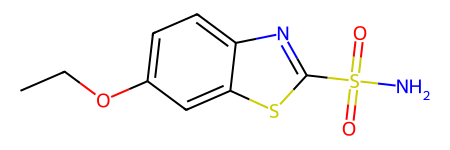

In [ ]:
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

In [ ]:
type(molecule)

rdkit.Chem.rdchem.Mol

### Implementation: GCN

In [13]:
import torch
from torch_geometric.nn import GCNConv
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp


embedding_size = 64

In [14]:
class GCN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 12)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)
        #hidden = F.leaky_relu(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        #hidden = F.leaky_relu(hidden)

        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        #hidden = F.leaky_relu(hidden)

        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
        #hidden = F.leaky_relu(hidden)
          
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)
        return out, hidden

In [15]:
model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=12, bias=True)
)
Number of parameters:  14668


### Training the GCN

In [16]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Root mean squared error

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) 

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True, drop_last=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [73]:
from torch import autograd

In [220]:
def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
    
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      y = torch.where(torch.isnan(batch.y), torch.zeros_like(batch.y), batch.y)
      loss = loss_fn(pred, y)  
      if not torch.isnan(loss):   
        loss.backward()  
        # Update using the gradients
        optimizer.step()   

    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 0.09511402994394302
Epoch 100 | Train Loss 0.05370516702532768
Epoch 200 | Train Loss 0.04577479884028435
Epoch 300 | Train Loss 0.04460771381855011
Epoch 400 | Train Loss 0.05260516703128815
Epoch 500 | Train Loss 0.0673525258898735
Epoch 600 | Train Loss 0.06452664732933044
Epoch 700 | Train Loss 0.05067691579461098
Epoch 800 | Train Loss 0.05008960887789726
Epoch 900 | Train Loss 0.05497562512755394
Epoch 1000 | Train Loss 0.05479394271969795
Epoch 1100 | Train Loss 0.05499710142612457
Epoch 1200 | Train Loss 0.08467570692300797
Epoch 1300 | Train Loss 0.04115467891097069
Epoch 1400 | Train Loss 0.07038872689008713
Epoch 1500 | Train Loss 0.06635680049657822
Epoch 1600 | Train Loss 0.07224666327238083
Epoch 1700 | Train Loss 0.04884345829486847
Epoch 1800 | Train Loss 0.05118061229586601
Epoch 1900 | Train Loss 0.07097186893224716


In [ ]:
def test(data):
    # Enumerate over the data
    for batch in test_loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
      # Calculating the loss and gradients
      y = torch.where(torch.isnan(batch.y), torch.zeros_like(batch.y), batch.y)
      loss = loss_fn(pred, y)  
      if not torch.isnan(loss):   
        loss.backward()  
        # Update using the gradients
        optimizer.step()   
    return loss, embedding

print("Starting testing...")
losses_test = []
for epoch in range(2000):
    loss, h = test(data)
    losses_test.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Test Loss {loss}")

Starting training...
Epoch 0 | Test Loss 0.05326080694794655
Epoch 100 | Test Loss 0.06610426306724548
Epoch 200 | Test Loss 0.06576190143823624
Epoch 300 | Test Loss 0.08225607872009277
Epoch 400 | Test Loss 0.07145252823829651
Epoch 500 | Test Loss 0.03840970620512962
Epoch 600 | Test Loss 0.06023532152175903
Epoch 700 | Test Loss 0.05051378533244133
Epoch 800 | Test Loss 0.05139686167240143
Epoch 900 | Test Loss 0.043788693845272064
Epoch 1000 | Test Loss 0.07609823346138
Epoch 1100 | Test Loss 0.06321408599615097
Epoch 1200 | Test Loss 0.044042836874723434
Epoch 1300 | Test Loss 0.047321200370788574
Epoch 1400 | Test Loss 0.06436879932880402
Epoch 1500 | Test Loss 0.05310908332467079
Epoch 1600 | Test Loss 0.05180537328124046
Epoch 1700 | Test Loss 0.04926084727048874
Epoch 1800 | Test Loss 0.05187756195664406
Epoch 1900 | Test Loss 0.04260827600955963


In [31]:
from torchmetrics import AUROC
from torchmetrics import Accuracy


def evaluate_train():
  for batch in loader:
    batch.to(device)
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
    y = torch.where(torch.isnan(batch.y), torch.zeros_like(batch.y), batch.y).long()

  auroc = AUROC(num_classes=12)
  acc = Accuracy(num_classes=12)
  return auroc(pred,y).item(), acc(pred,y).item()

auroc_t, acc_t = evaluate_train()

print(f"Training ROC-AUC: {auroc_t}, Training accuracy: {acc_t}")


def evaluate_test():
  for batch in test_loader:
    batch.to(device)
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
    y = torch.where(torch.isnan(batch.y), torch.zeros_like(batch.y), batch.y).long()

  auroc = AUROC(num_classes=12)
  acc = Accuracy(num_classes=12)
  return auroc(pred,y).item(), acc(pred,y).item()

auroc, acc = evaluate_test()

print(f"Test ROC-AUC: {auroc}, Test accuracy: {acc}")





Training ROC-AUC: 0.530190646648407, Training accuracy: 0.9244791865348816
Test ROC-AUC: 0.3950921297073364, Test accuracy: 0.9301075339317322


In [100]:
import pandas as pd

test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    y = torch.where(torch.isnan(test_batch.y), torch.zeros_like(test_batch.y), test_batch.y)
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

y_real    y_pred
0      1.0  0.061936
1      0.0  0.031290
2      0.0  0.041060
3      0.0  0.046457
4      0.0  0.025290
..     ...       ...
59     0.0  0.051734
60     0.0  0.062329
61     0.0  0.003760
62     0.0  0.054057
63     0.0  0.023318

[64 rows x 2 columns]

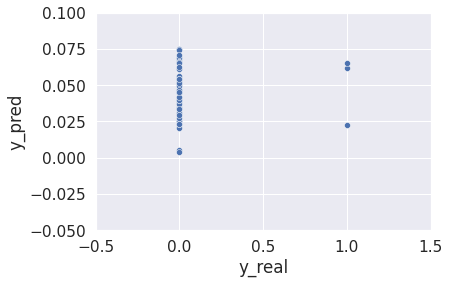

In [101]:
import seaborn as sns
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-0.5, 1.5))
plt.set(ylim=(-0.05, 0.1))
plt